In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import joblib
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import mean_squared_error
import lightgbm as lgbm
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.model_selection import train_test_split
import dask.dataframe as dd

In [3]:
df = pd.read_csv("s3://data-science-kavak-dev/projects/cerberus/v2/dev/income/data/aprobados.csv")

In [16]:
df = df.query("ingreso_neto_comprobado > 8000")

In [17]:
from evaluation import predict_multiple_models
models = ["%_validated_model", "declarado_final_con_clip_model","declarado_sin_clip_model","sin_declarado_sin_clip_model","sin_declarado_con_clip_model"]

path_models = "s3://data-science-kavak-dev/projects/cerberus/v2/dev/income/models/"
df = predict_multiple_models(df, models, path_models)

Creating columns %_validated_model
Creating columns declarado_final_con_clip_model
Creating columns declarado_sin_clip_model
Creating columns sin_declarado_sin_clip_model
Creating columns sin_declarado_con_clip_model


In [18]:
df["validated_final_model"] = df["net_income_verified"]*df["%_validated_model"]
df["validated_final_model"] =  df["validated_final_model"].astype(int)

### MAPE

In [19]:
df = df.loc[df["ingreso_neto_comprobado"].notnull(),]

In [20]:
MAPE(df["ingreso_neto_comprobado"],df["validated_final_model"] )

0.15491600082326892

In [21]:
from evaluation import evaluate_model

validated_final_model
                      Mape_promedio  Diferencia_promedio  Cantidad_clientes
salarios_min                                                               
1 hasta 2 salarios              NaN                  NaN                NaN
2 hasta 3 salarios         0.184661          1209.848133              959.0
3 hasta 5 salarios         0.149799           357.993828             3819.0
5 hasta 8 salarios         0.136136          -690.749476             3598.0
8 hasta 12 salarios        0.158874         -1006.783437             2159.0
12 hasta 16 salarios       0.138709         -3562.677150             1400.0
+ de 16 salarios           0.191931       -408139.123069             1965.0
declarado_final_con_clip_model
                      Mape_promedio  Diferencia_promedio  Cantidad_clientes
salarios_min                                                               
1 hasta 2 salarios              NaN                  NaN                NaN
2 hasta 3 salarios         1.113992

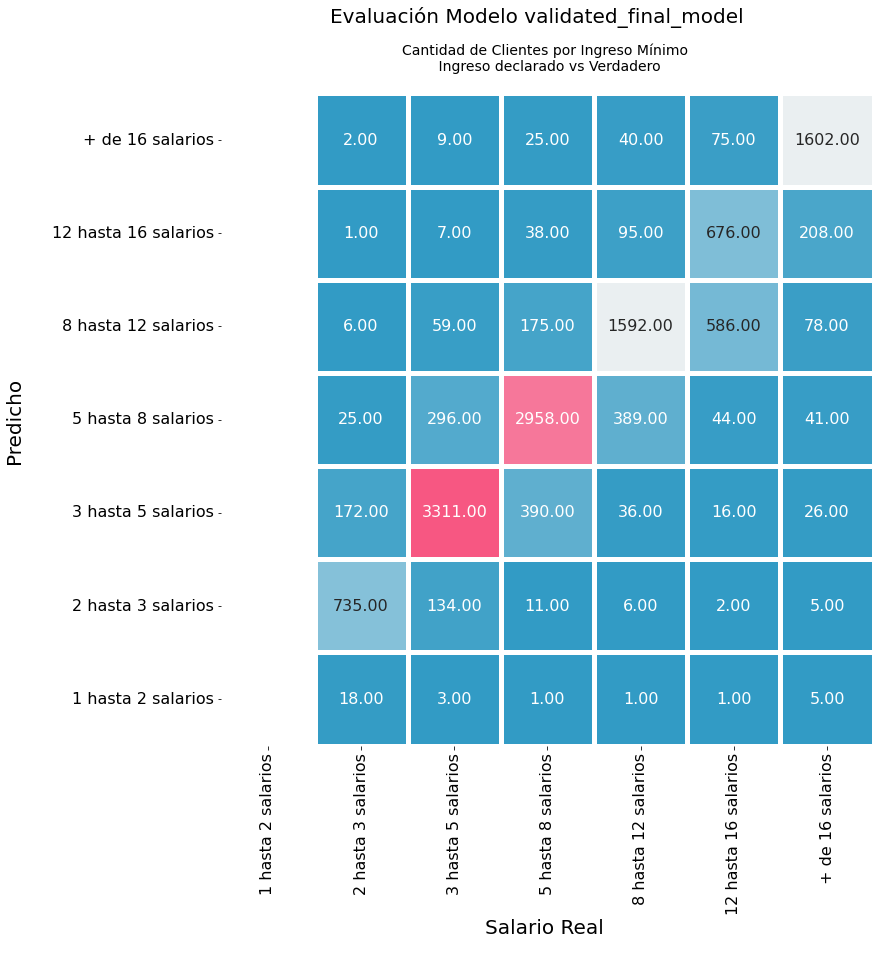

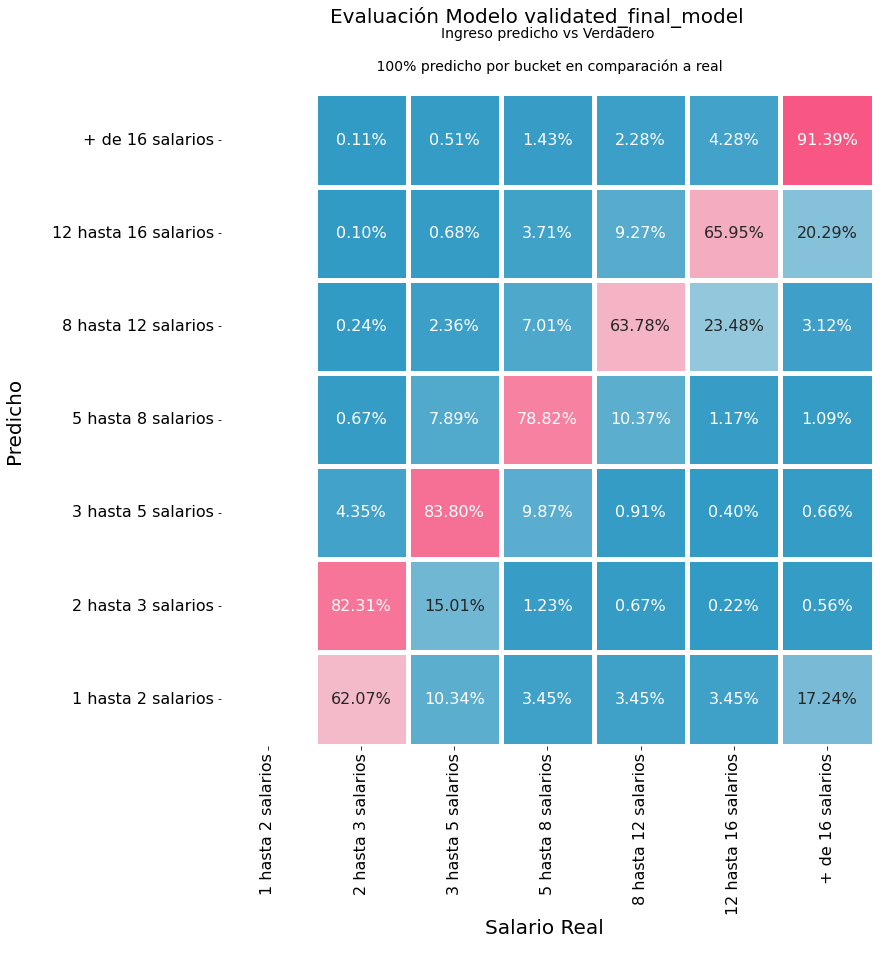

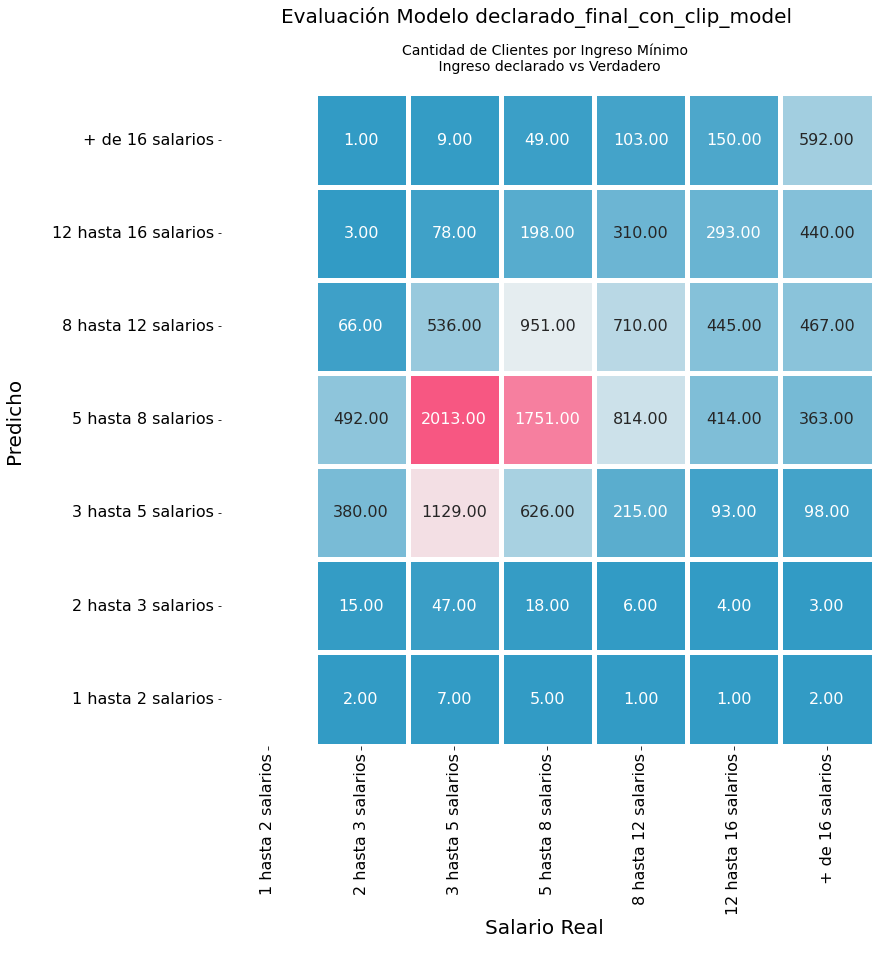

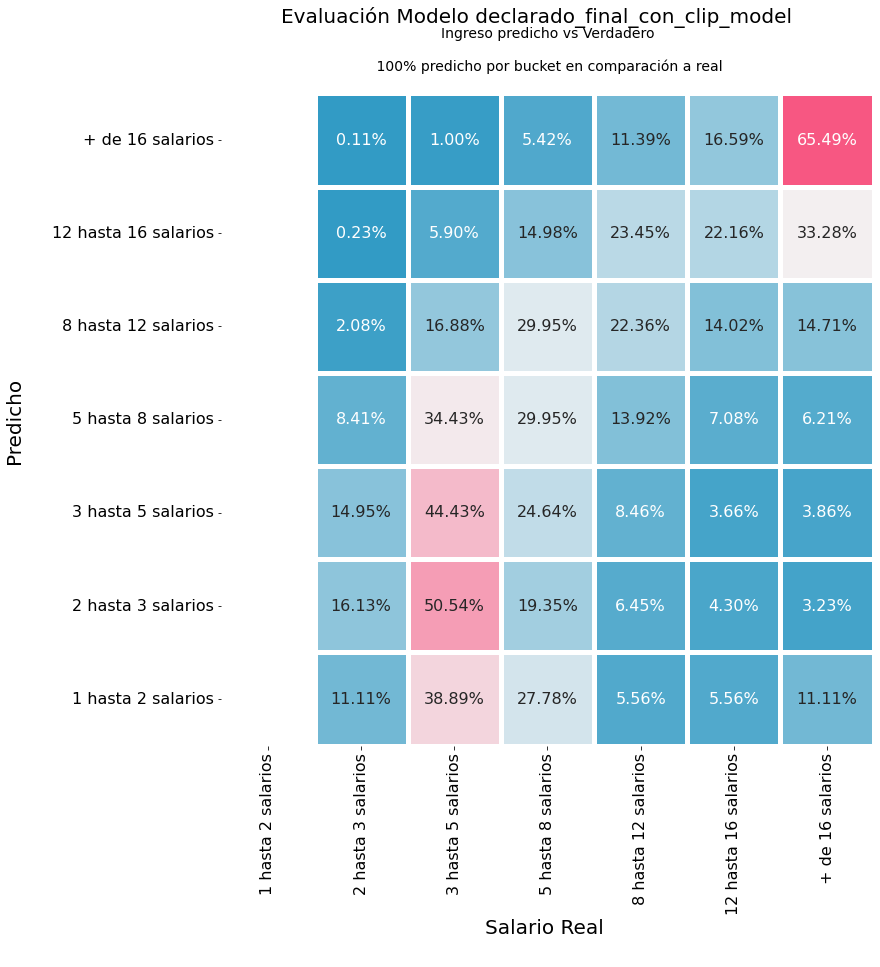

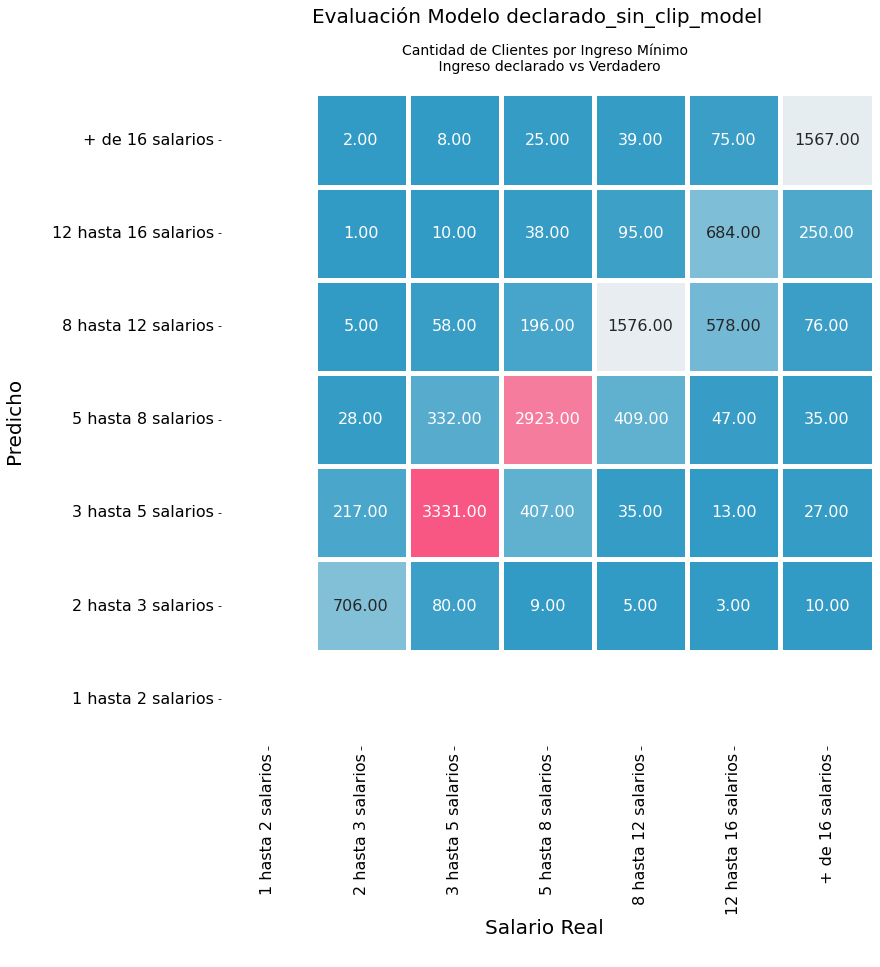

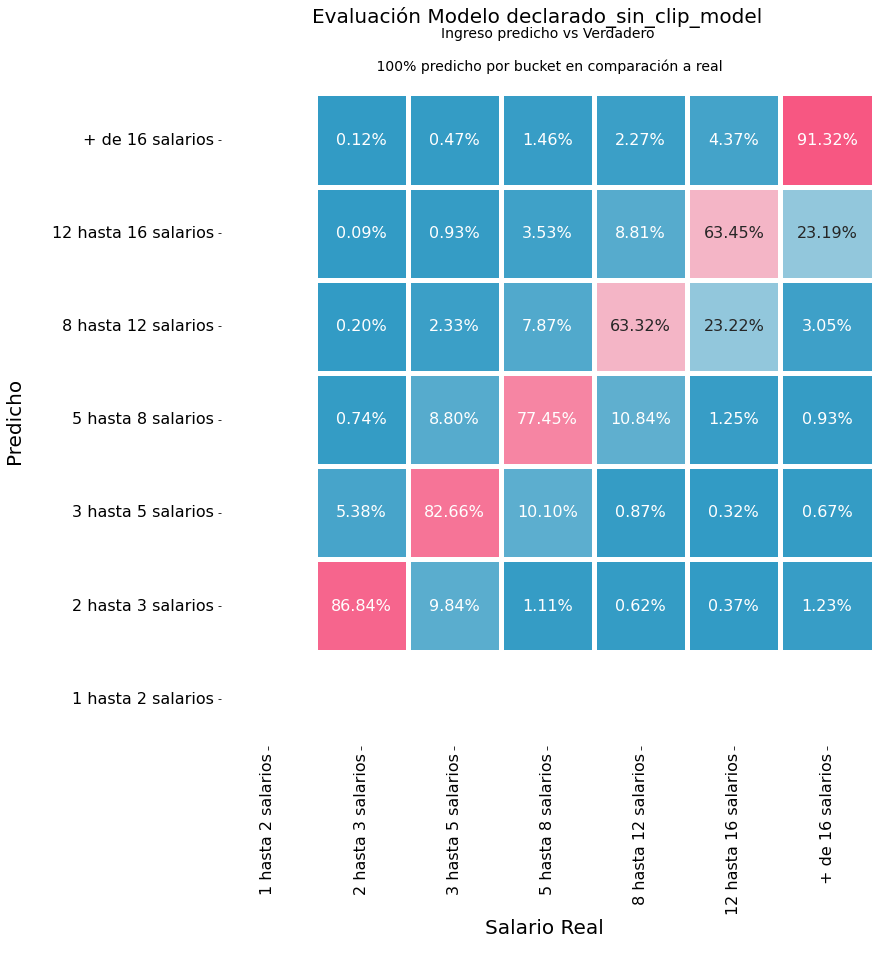

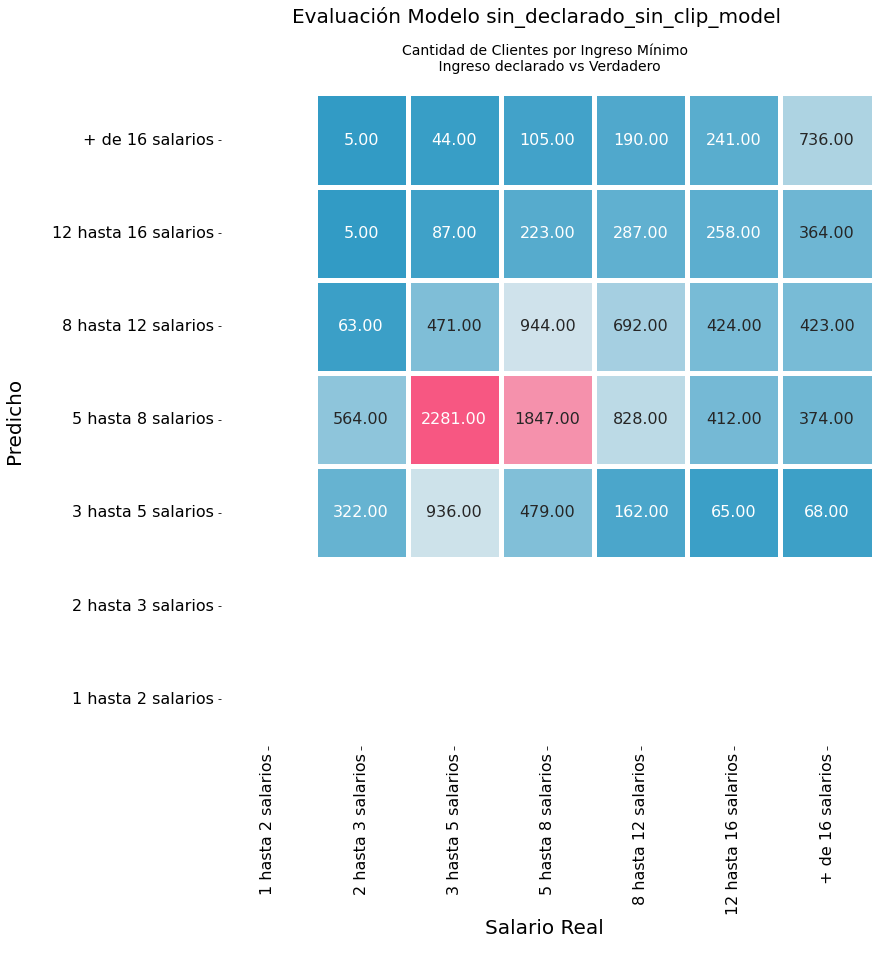

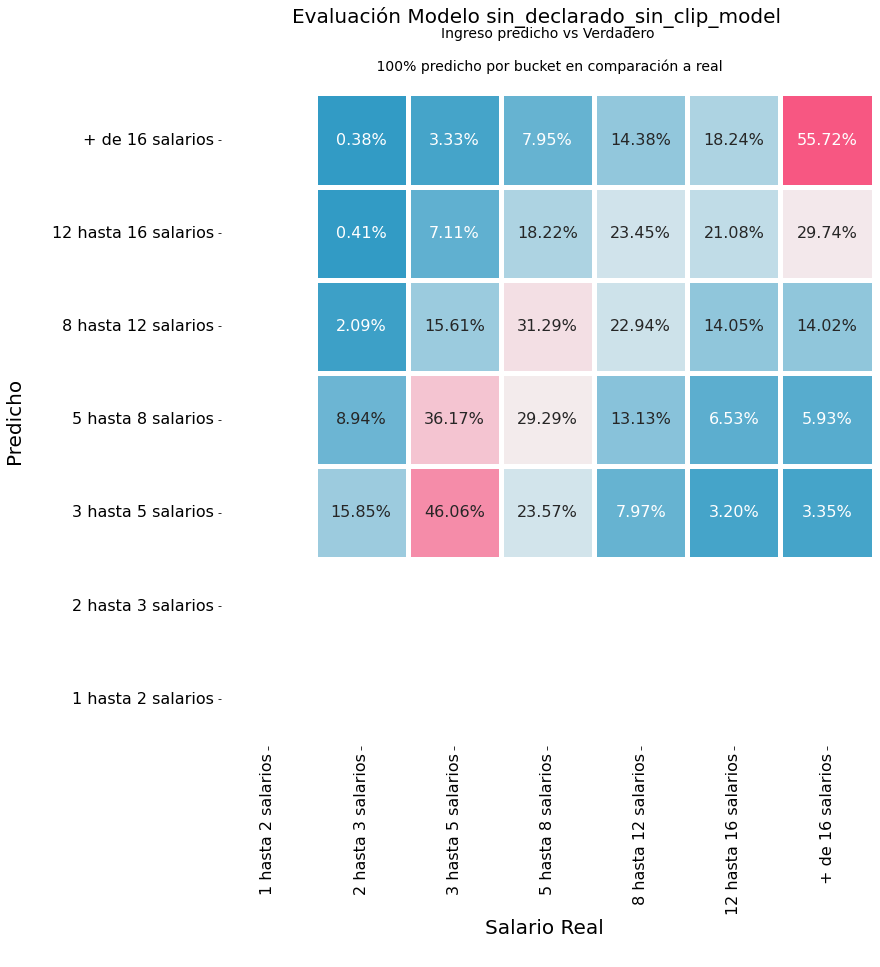

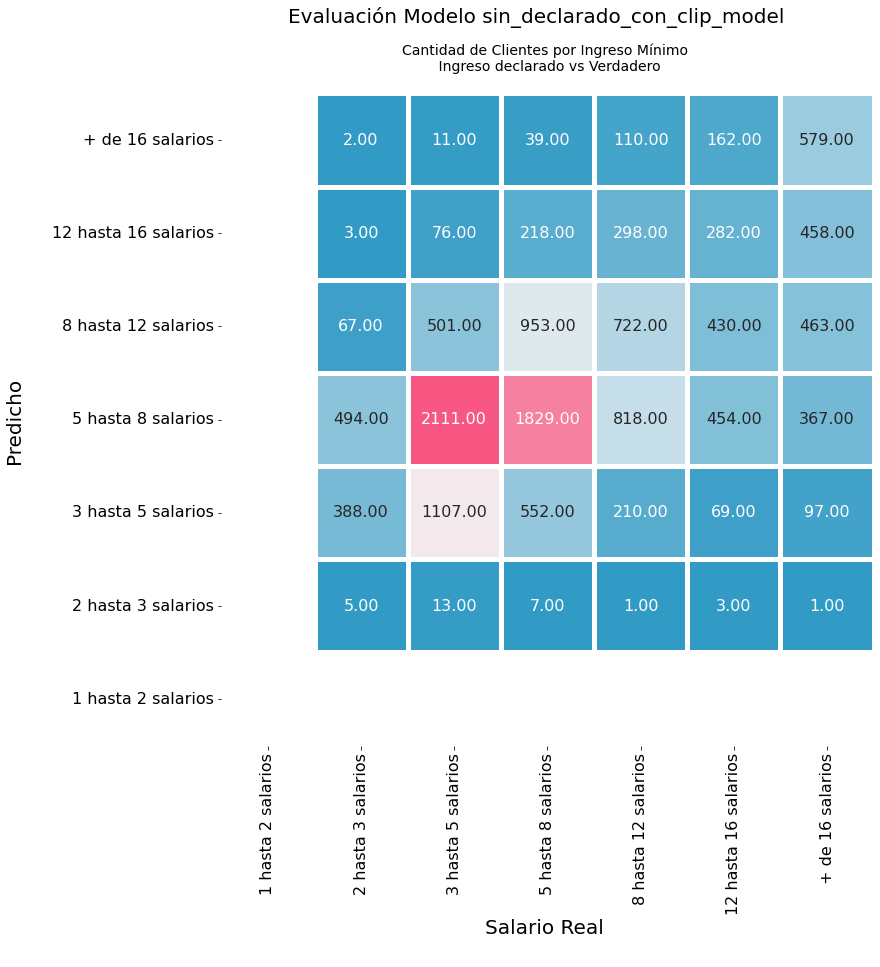

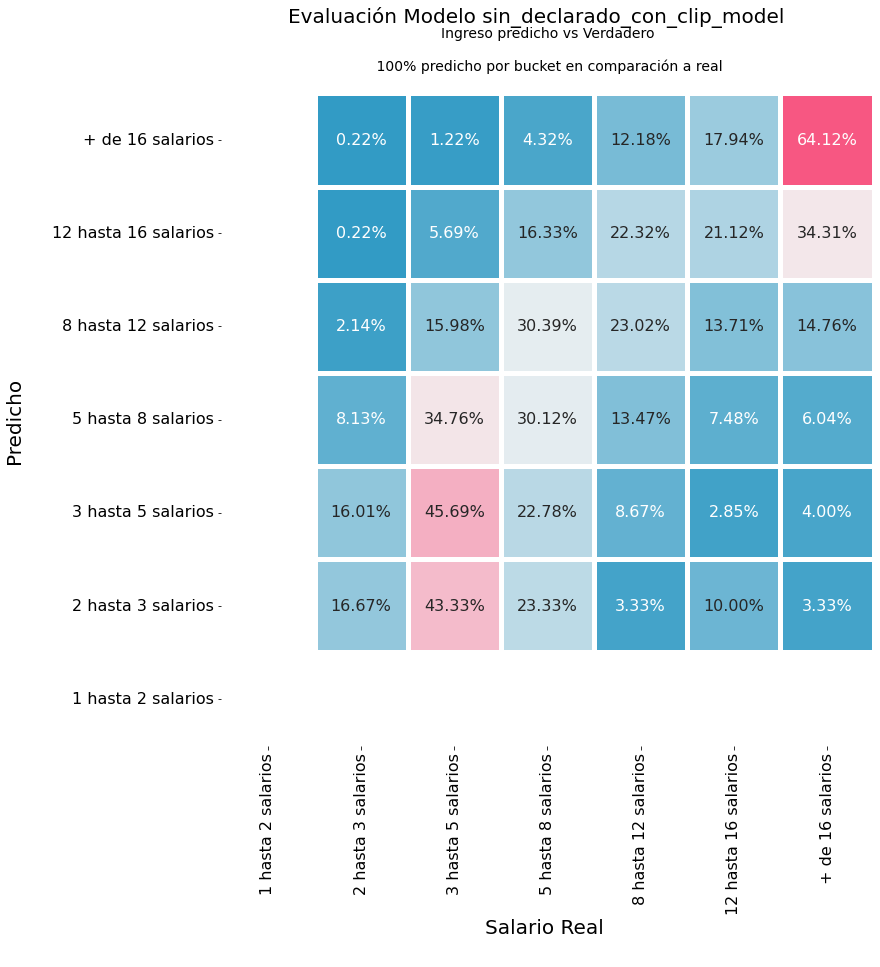

In [22]:
models = ["validated_final_model", "declarado_final_con_clip_model","declarado_sin_clip_model","sin_declarado_sin_clip_model","sin_declarado_con_clip_model"]

for modelname in models:
    print(modelname)
    evaluate_model(df=df, pred=modelname,true="ingreso_neto_comprobado",metric="mape")
    

# Evaluacion % Validado

                      Mape_promedio  Diferencia_promedio  Cantidad_clientes
salarios_min                                                               
1 hasta 2 salarios         0.061836           457.637907                 43
2 hasta 3 salarios         0.104838          1113.692763                959
3 hasta 5 salarios         0.135610          2283.545805               3819
5 hasta 8 salarios         0.172138          4572.807500               3598
8 hasta 12 salarios        0.190523          7435.223048               2159
12 hasta 16 salarios       0.203433         10985.132850               1400
+ de 16 salarios           0.527972        213492.716626               1965


(<Figure size 864x864 with 1 Axes>, <Figure size 864x864 with 1 Axes>)

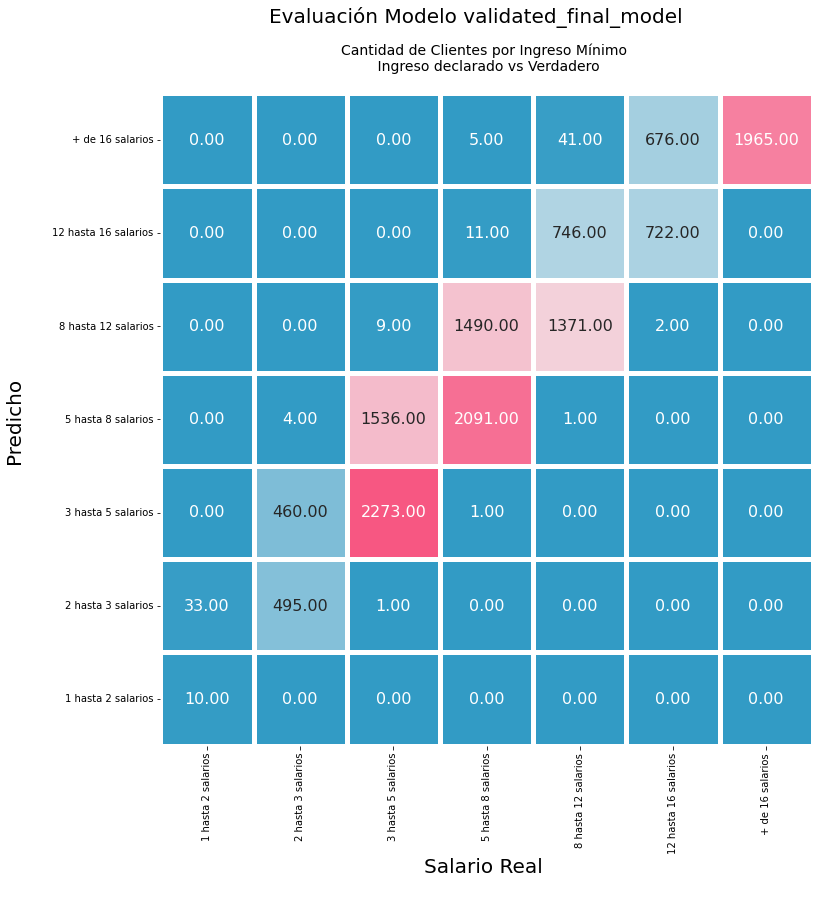

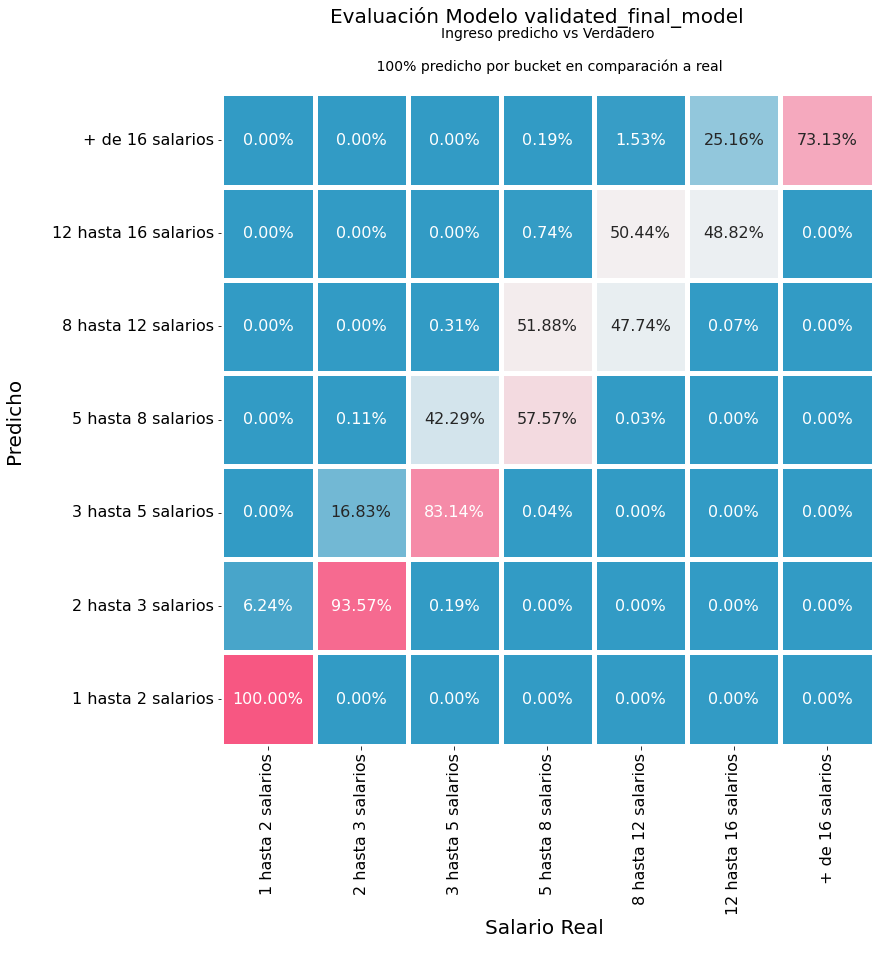

In [10]:
from evaluation import evaluate_model
evaluate_model(df=df, pred="validated_final_model",true="ingreso_neto_comprobado",metric="mape")

# Evaluacion con ingreso declarado

                      Mape_promedio  Diferencia_promedio  Cantidad_clientes
salarios_min                                                               
1 hasta 2 salarios         0.882038          6675.844536                 43
2 hasta 3 salarios         0.207493          1616.029386                959
3 hasta 5 salarios         0.141902           498.317560               3819
5 hasta 8 salarios         0.134697          -687.765409               3598
8 hasta 12 salarios        0.139086         -2051.161358               2159
12 hasta 16 salarios       0.127407         -3974.457260               1400
+ de 16 salarios           0.262624       -428412.581011               1965


(<Figure size 864x864 with 1 Axes>, <Figure size 864x864 with 1 Axes>)

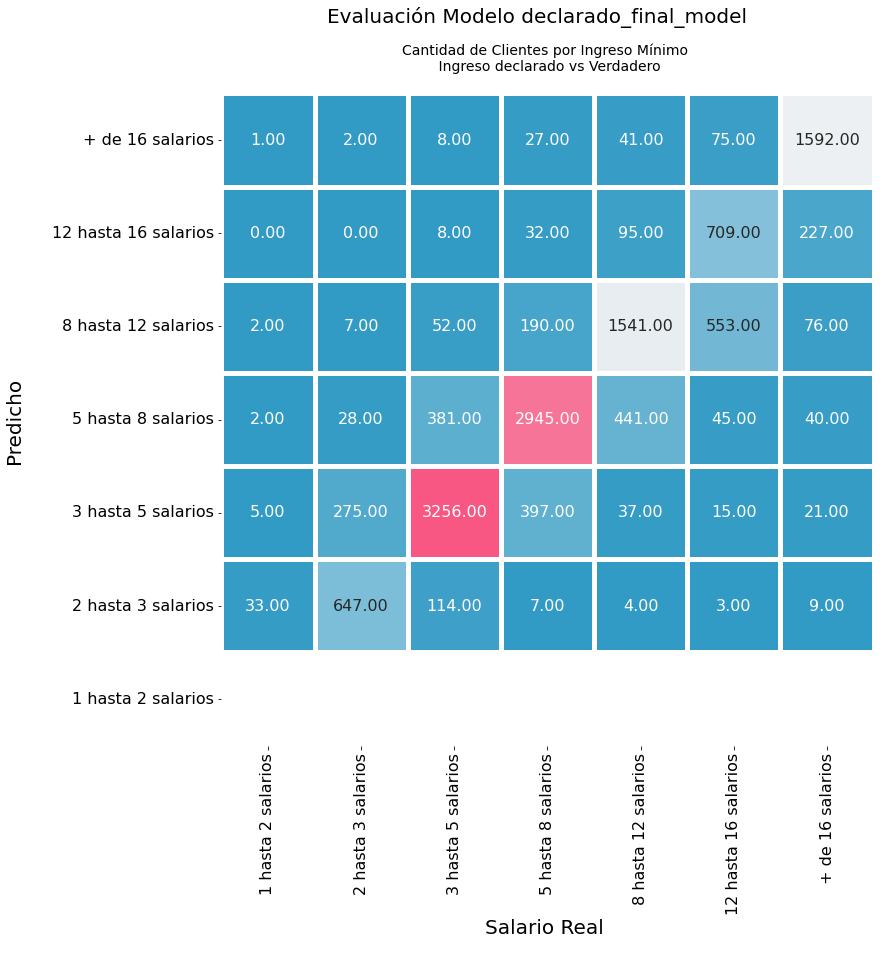

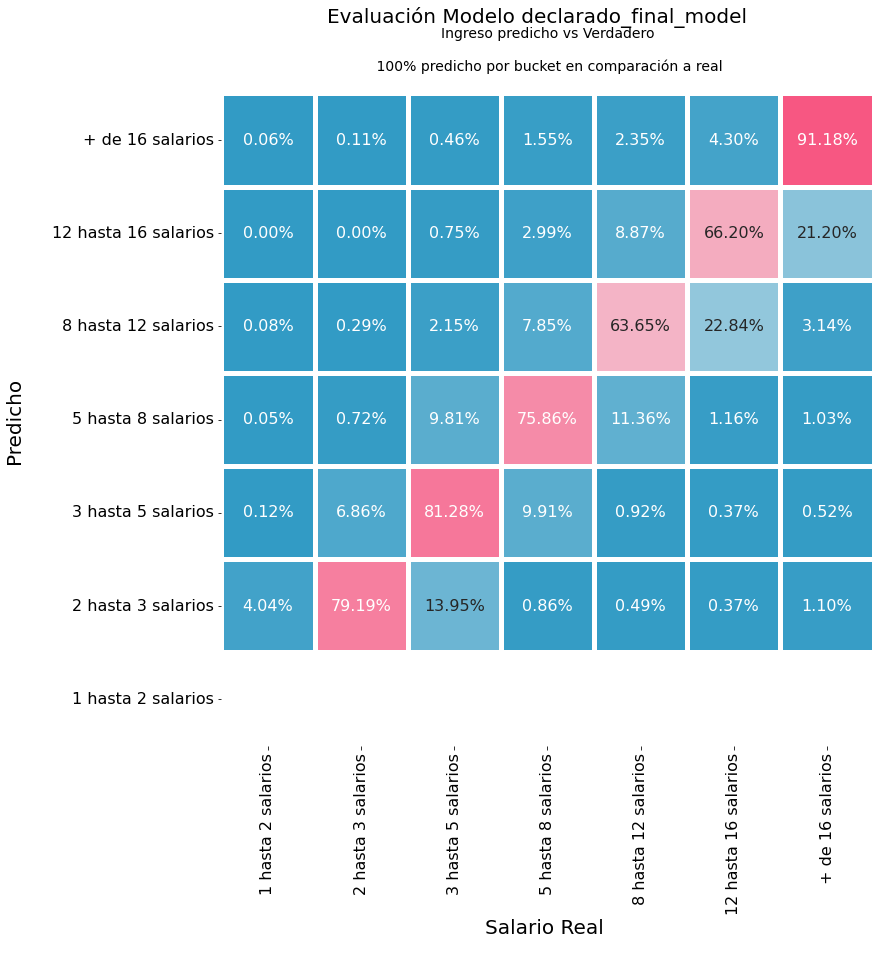

In [11]:
evaluate_model(df=df, pred="declarado_final_model",true="ingreso_neto_comprobado",metric="mape")